In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# 准备数据集
train_data = torchvision.datasets.CIFAR10(root='../data', train=True, transform=torchvision.transforms.ToTensor(),
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='../data', train=False, transform=torchvision.transforms.ToTensor(),
                                         download=True)


# print("训练集的长度:{}".format(len(train_data)))
# print("测试集的长度:{}".format(len(test_data)))

# DataLoader加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 搭建神经网络
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 64),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x

# 创建网络模型
model = Model().cuda()

#添加tensorboard可视化数据
writer = SummaryWriter('../logs_tensorboard')

# 损失函数
loss = nn.CrossEntropyLoss().cuda()

# 优化器
optimizer  = torch.optim.SGD(model.parameters(),lr=0.01,)

i = 1 # 用于绘制测试集的tensorboard

# 开始循环训练
for epoch in range(30):
    num_time = 0 # 记录看看每轮有多少次训练
    print('开始第{}轮训练'.format(epoch+1))
    model.train() # 也可以不写，规范的话是写，用来表明训练步骤
    for data in train_dataloader:
        # 数据分开 一个是图片数据，一个是真实值
        imgs,targets = data
        imgs = imgs.cuda()
        targets = targets.cuda()
        # 拿到预测值
        output = model(imgs)
        # 计算损失值
        loss_in = loss(output,targets)
        # 优化开始~ ~ 先梯度清零
        optimizer.zero_grad()
        # 反向传播+更新
        loss_in.backward()
        optimizer.step()
        num_time +=1

        if num_time % 100 == 0:
            writer.add_scalar('看一下训练集损失值',loss_in.item(),num_time)

    sum_loss = 0 # 记录总体损失值

    # 每轮训练完成跑一下测试数据看看情况
    accurate = 0
    model.eval() # 也可以不写，规范的话就写，用来表明是测试步骤
    with torch.no_grad():
        for data in test_dataloader:
            # 这里的每一次循环 都是一个minibatch  一次for循环里面有64个数据。
            imgs , targets = data
            imgs = imgs.cuda()
            targets = targets.cuda()
            output = model(imgs)
            loss_in = loss(output,targets)

            sum_loss += loss_in
            print('这里是output',output)
            accurate += (output.argmax(1) == targets).sum()

    print('第{}轮测试集的正确率:{:.2f}%'.format(epoch+1,accurate/len(test_data)*100))

    writer.add_scalar('看一下测试集损失',sum_loss,i)
    writer.add_scalar('看一下当前测试集正确率',accurate/len(test_data)*100,i)
    i +=1

   # torch.save(model,'../model_pytorch/model_{}.pth'.format(epoch+1))
  #  print("第{}轮模型训练数据已保存".format(epoch+1))

writer.close()
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# 准备数据集
train_data = torchvision.datasets.CIFAR10(root='../data', train=True, transform=torchvision.transforms.ToTensor(),
                                          download=True)
test_data = torchvision.datasets.CIFAR10(root='../data', train=False, transform=torchvision.transforms.ToTensor(),
                                         download=True)


# print("训练集的长度:{}".format(len(train_data)))
# print("测试集的长度:{}".format(len(test_data)))

# DataLoader加载数据集
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 搭建神经网络
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 64),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x

# 创建网络模型
model = Model().cuda()

#添加tensorboard可视化数据
writer = SummaryWriter('../logs_tensorboard')

# 损失函数
loss = nn.CrossEntropyLoss().cuda()

# 优化器
optimizer  = torch.optim.SGD(model.parameters(),lr=0.01,)
Loss=[]
test_cor=[]
pre_cor=[]
i = 1 # 用于绘制测试集的tensorboard

# 开始循环训练
for epoch in range(30):
    total=0
    correct=0
    num_time = 0 # 记录看看每轮有多少次训练
    print('开始第{}轮训练'.format(epoch+1))
    model.train() # 也可以不写，规范的话是写，用来表明训练步骤
    sum_loss = 0 # 记录总体损失值

    for data in train_dataloader:
        # 数据分开 一个是图片数据，一个是真实值
        imgs,targets = data
        imgs = imgs.cuda()
        targets = targets.cuda()
        # 拿到预测值
        output = model(imgs)
        _,pre = torch.max(output.data, 1)
        total += targets.size(0)
        correct+=(pre == targets).sum().item()
        # 计算损失值
        loss_in = loss(output,targets)
        sum_loss+=loss_in.item()
        if (num_time+1) == 49999:
          test_cor.append(100 * correct / total)
        # 优化开始~ ~ 先梯度清零
        optimizer.zero_grad()
        # 反向传播+更新
        loss_in.backward()
        optimizer.step()
        num_time +=1

        if num_time % 100 == 0:
            writer.add_scalar('看一下训练集损失值',loss_in.item(),num_time)
    Loss.append(loss_in)
  
    # 每轮训练完成跑一下测试数据看看情况
    accurate = 0
    total=0
    correct=0
    num_time = 0
    model.eval() # 也可以不写，规范的话就写，用来表明是测试步骤
    with torch.no_grad():
        for data in test_dataloader:
            # 这里的每一次循环 都是一个minibatch  一次for循环里面有64个数据。
            num_time+=1
            imgs , targets = data
            imgs = imgs.cuda()
            targets = targets.cuda()
            output = model(imgs)
            _, predicted = torch.max(output.data, 1)
            total += targets.size(0)
            correct+=(predicted == targets).sum().item()
            if num_time% 10000==0:
                pre_cor.append(100 * correct / total)
            print('这里是output',output)
            accurate += (output.argmax(1) == targets).sum()

    print('第{}轮测试集的正确率:{:.2f}%'.format(epoch+1,accurate/len(test_data)*100))

    writer.add_scalar('看一下测试集损失',sum_loss,i)
    writer.add_scalar('看一下当前测试集正确率',accurate/len(test_data)*100,i)
    i +=1

    #torch.save(model,'../model_pytorch/model_{}.pth'.format(epoch+1))
   # print("第{}轮模型训练数据已保存".format(epoch+1))

writer.close()



URLError: <urlopen error [WinError 10054] 远程主机强迫关闭了一个现有的连接。>

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

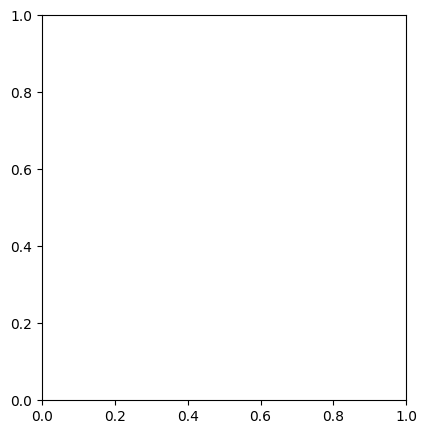

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  # 防止plt发疯用的
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))

plt.subplot(133)
plt.plot([i + 1 for i in range(10)], mlp_loss, label='loss',color='red')
plt.title('Xing_Xia')
plt.legend()

plt.subplot(132)
plt.plot( [i + 1 for i in range(10)], pre_cor,label='pre_correctrate',color='green')
plt.title('Xing_Xia')
plt.legend()
plt.subplot(131)
plt.plot([i + 1 for i in range(10)],test_cor, label='test_correctrate')
plt.title('Xing_Xia')
plt.legend()

plt.tight_layout()
plt.show()